# Linear and Nonlinear Operations

Throughout the semester we will invoke models which employ layers of linear and non-linear operations on our data. Recall that deep learning algorithms are the subclass of machine learning algorithms (algorithms which learn from data) which learn complex concepts by representing them as a deep graph with many layers. This enables deep learning algorithms to learn targeted complex concepts from simpler concepts. As we will see, such a graph must contain both linear and nonlinear functions to be useful to us. To prepare to understand why this is, we will look at some basic linear and nonlinear functions, and try to perform useful tasks with them by hand, before progressing on to use numerical optimization methods to enable our graphs of linear and nonlinear functions to learn from data automatically.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

## Linear Operations

For our purposes in this class, a linear operation is a function or process $f$ with output $y$ that changes proportionally to changes in an input $x$. The output and input can be scalars, vectors, matrices, random variables, or even other functions. When considering how a linear process can affect a *function* input it is often helpful to imagine the function as a vector with an infinite number of components, one component for the value of the function at each location.

If a function or process is linear, a change in its input, $\Delta x = x_1 - x_0$, will yield a proportional change in its output $\Delta y = f(x_1) - f(x_0)$, such that $\Delta y = A \Delta x$, where $A$ is a constant.

To find the output of a linear operation applied to a sum, we can simply sum the outputs that would result from each individual input.

$$
f(x_1 + x_2) = f(x_1) + f(x_2).
$$

Scaling the input of a linear operation by a constant value will scale the output by the same amount.

$$
f(ax) = af(x).
$$

Putting these properties together, we have the following relationship for a linear function.

$$
f(a_1 x_1 + a_2 x_2) = a_1 f(x_1) + a_2 f(x_2)
$$

Plotting any output of a linear operation with respect to one of its inputs yields a straight line. We can visualize how a change in the input of a linear operation affects a change in output by plotting some inputs and deviations from those inputs. Below we define a simple linear function, and then specify some starting values, $x_0$, and some deviations from those values, $\Delta x$, and observe how these propagate through the function.

We see the following
1. Regardless of the starting value, the change in input always causes a proportional change in output.
2. The sum of two inputs yields an output proportional to that sum.

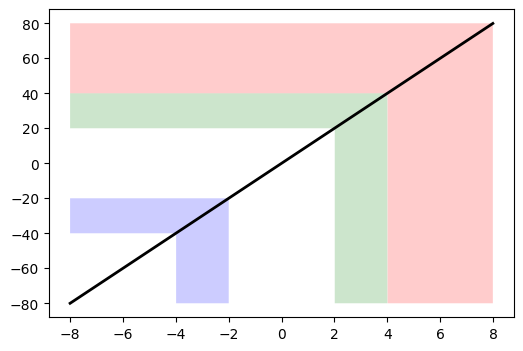

In [2]:
from function_demonstrations import plot_dx_list


def simple_linear_function(x):
    y = 10 * x
    return y


x = np.arange(-8, 8, 0.01)
y = simple_linear_function(x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, "k", linewidth=2)

x0_values = [-4, 2, 4]
dx_values = [2, 2, 4]
color_strings = ["b", "g", "r"]


plot_dx_list(
    ax, x, simple_linear_function, x0_values, dx_values, color_strings
)

## Example Linear Operations

The following are all linear operations. Notice how all of these functions fit the template $y = Ax$ in some form.

### As Simple As it Gets!

The most basic linear function is a straight line. For example, 
$$
f(x) = 2x
$$
where
$$
y=Ax,\ A = 2.
$$

Here we have a linear operation with a scalar input, scalar output, and a single scalar parameter.

### Vector Input, Scalar Output

A simple vector-in, vector-out linear operation can be defined via a dot product. For example,
$$
\mathbb{f}(\mathbb{x}) = 2x_1 + 3x_2 + 6x_3
$$
where
$$
\mathbb{y} = \mathbb{a} \cdot \mathbb{x},
$$
and the parameters and input variables are both vectors,
$$
\begin{align*}
\mathbb{a} &= (2,3,6),\\
\mathbb{x} &= (x_1, x_2, x_3).
\end{align*}
$$

Here the dot product operation combines the vector input with the parameter vector to produce a scalar output.

### Vector Input, Vector Output
Consider a linear matrix equation,
$$
\begin{align*}
\begin{pmatrix}y_1\\y_2\\y_3\end{pmatrix}
&=
\begin{pmatrix}
1&5&2\\
3&8&4\\
2&3&9\\
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}, \\
\end{align*}
$$
where
$$
\begin{align*}
\mathbb{y} &= \mathrm{A}\mathbb{x}, \\
\mathrm{A} &=
\begin{pmatrix}
1&5&2\\
3&8&4\\
2&3&9\\
\end{pmatrix}.
\end{align*}
$$

Here the parameters of the operation are defined by the matrix $\mathrm{A}$. The input is a vector, and the output is another vector resulting from a matrix multiplication.

### Random Variable Input, Scalar Output
The expected value operator, $\mathrm{E}[X]$, is an example of a linear operator that accepts a random variable as its input and returns a scalar value as its output.

$$
\mathrm{E}[X] = \int_{-\infty}^{\infty} x f(x) dx .
$$

Expected value is linear.

$$
\begin{align*}
\mathrm{E}[X + Y] &= \mathrm{E}[X] + \mathrm{E}[Y] \\
\mathrm{E}[aX] &= a\mathrm{E}[X]
\end{align*}
$$

Here the $y = Ax$ form is less obvious at first. To make it more obvious, consider the expected value of a discrete variable,

$$
\begin{align*}
\mathrm{E}[x] &= x_1 p_1 + x_2 p_2 + \cdots + x_K p_K \\
    &= \sum_k x_k p_k \\
    &= \mathbb{x} \cdot \mathbb{p}.
\end{align*}
$$

Here, the linearity of the operation is obvious when we think of the possible values of the discrete random variable as a vector, and their respective probabilities as another vector,

$$
\begin{align*}
\mathbb{x} = \begin{pmatrix}x_1 & \cdots & x_K \end{pmatrix}, \\
\mathbb{p} = \begin{pmatrix}p_1 & \cdots & p_K \end{pmatrix}.
\end{align*}
$$

While it might be difficult at first to see how this relates to the definition of expected value for continuous distributions, it becomes apparent when considering the integral as a sum of increasingly small rectangles,

$$
\begin{align*}
\mathrm{E}[X] &= \int_{-\infty}^{\infty} x f(x) dx, \\
    &= \lim_{\alpha \to \infty} \int_{-\alpha}^\alpha x f(x) dx, \\
    &= \lim_{\alpha \to \infty} \lim_{\Delta x \to 0} \begin{pmatrix}x_1 p_1 + \cdots + x_K p_K \end{pmatrix} \\
    &= \lim_{\alpha \to \infty} \lim_{\Delta x \to 0} \mathbb{p} \cdot \mathbb{x},
\end{align*}
$$
where
$$
\begin{align*}
x_k &= x_{k-1} + \Delta x,\ x_1 = -\alpha,\ x_K = \alpha,\\
p_k &= f(x_k).
\end{align*}
$$

This demonstration is not rigorous, but it is helpful in this context to imagine the continuous random variable $x$ as a vector with an increasingly many components, and to imagine its expected value as a dot product with a vector of the probabilities of occurrence for each respective value of the random variable.

To make this explanation rigorous, we can replace the dot product with the generalized notion of an inner-product, which is defined for functions as

$$
\langle u, v \rangle = \int_a^b u(t) v(t) dt.
$$

Like the dot product, the inner-product is linear.

### Function Input, Function Output

A convolution operation is an example of a linear operation with a function input and a function output.

$$
\begin{align*}
h(x) &= f(t) * g(t) \\
     &= f(\tau) g(t-\tau) d \tau
\end{align*}
$$

Convolution is a linear operation.

$$
(a f_1(t) + b f_2(t)) * g(t) = a f_1(t) * g(t) + b f_2(t) * g(t)
$$

This can be made apparent upon inspection of the convolution formula,

$$
\lparen f * g \rparen = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau,
$$

using a similar argument to that used to demonstrate the linearity of the expected value operation.

### Integrals

In general, the linearity of the above operations on distributions and functions follows from the linearity of integrals,

$$
\int_a^b \lparen \alpha f(x) + \beta g(x) \rparen dx = \alpha \int_a^b f(x) dx + \beta \int_a^b g(x) dx,
$$

which itself follow from the Riemann sum definition of integrals.

## Nonlinear Operations

As the name suggests, a nonlinear operation is any operation that is *not linear*. For our purposes in this class, this is any function or process $f$ with output $y$ where the description of linear operations above is not true, i.e., a nonlinear operation is one where a change in input $x$ does *not* always yield a proportional change in output $y$. As with linear processes, the output and input to a nonlinear process can be scalars, vectors, matrices, random variables, or even other functions.

If a function or process is nonlinear, a change in its input, $\Delta x = x_1 - x_0$, will not always yield a proportional change in its output $\Delta y = f(x_1) - f(x_0)$, such that $\Delta y \neq A \Delta x$, for a constant $A$.

The convenient relationships we are used to holding true for linear functions are not always true for nonlinear functions:

$$
\begin{align*}
f(x_1 + x_2) &\neq f(x_1) + f(x_2), \\
f(ax) &\neq af(x), \\
f(a_1 x_1 + a_2 x_2) &\neq a_1 f(x_1) + a_2 f(x_2).
\end{align*}
$$

This can make solving for analytical relationships about how a nonlinear operation will affect a dataset difficult, and often completely intractable, since the usual rules which allow simplification of calculations involving linear operations are not guaranteed to hold true. While it is often possible to identify regions where a function is linear (piecewise linear functions) or to study a function's behavior on a small enough interval that it is approximately linear, as we will see throughout the semester, we often need to resort to numerical methods to determine how a nonlinear function will affect a dataset. This is especially true when we need to use many layers of nonlinear operations, which we will also see is often necessary.

Solving for a nonlinear function, out of a group of hypothesized nonlinear functions, which performs a desired task on a dataset is the challenge at the heart of all machine learning problems and our main motivation for beginning our study of practical AI with an introduction to linear and nonlinear functions. 

### Intuition for Nonlinear Operations

Unfortunately, the typical "description" of nonlinear functions is not very descriptive or intuitive! If we know a function is linear, we know it belongs to a class of functions that is special, for which many methods and simplifications from many specialized fields of study apply. However, if we only know that a function is *not* linear, we do not know much about it, other than the fact that it does not belong to this category and these simplifications do not apply. Meanwhile, most processes we observe in the real world are nonlinear. This is due to the fact that any process in the real world is subject to practical *limitations*. The real world is always imposing practical constraints on processes within it. These practical constraints are the source of nonlinear behaviors in the real world. It is helpful to consider some examples before considering example nonlinear mathematical functions.

#### Springs

One of the simplest and most familiar examples of nonlinearity is the behavior of a spring. We often use a simplified version of Hook's Law to study springs in introductory physics classes. The simplified version of Hook's law states that the amount of force the spring pulls with is proportional to the distance the spring is displaced from its rest state and is exerted in the opposite direction of the displacement, expressed as

$$
F_S = -kx.
$$

This is simple and intuitive. The further we pull a spring away from its position at rest, the harder it pulls back. This is true in the lab under controlled conditions, when we use small springs and displace them with commensurately small forces. But is it true in practice? Surely it is not.

What if we took the spring from a mechanical pencil and asked the strongest student in class to stretch it out, instead of attaching it to a small weight? What if we fixed it to a car and stretched it out? Would we still expect the spring to pull back with a force proportional to the distance we stretched it, $x$?

It is easy to see how this is not possible. The string only has so many molecules in it, and their bonds all have a finite strength. For any given spring, there is a certain point at which we will stretch it so much that it will not be able to pull back as hard as it used to, and a further point at which we will stretch it so far that it will break! These limits are not accounted for in the most basic version of Hook's law, but are at the heart of how more advanced formulations of Hook's law and other principles from mechanical engineering enable predicting the behavior of mechanical objects in the real world.





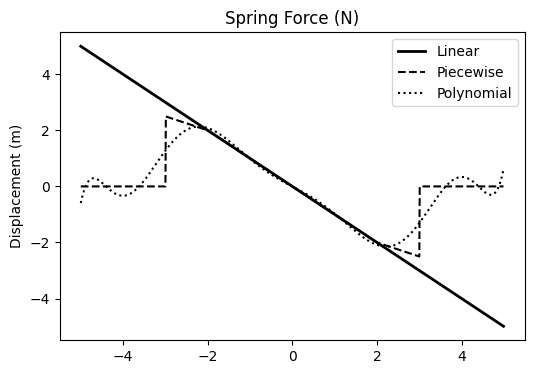

In [3]:
from spring_demonstrations import SpringForceModel

displacement_x = np.arange(-5, 5, 0.01)

spring_model = SpringForceModel(
    spring_constant_normal_regime_k1=1,
    spring_constant_unrecoverable_regime_k2=0.5,
    recoverable_limit_x1=2,
    breakdown_limit_x2=3,
    n_coefficients=10,
)

force_linear = spring_model.compute_spring_force_linear(displacement_x)
force_piecewise = spring_model.compute_spring_force_piecewise(displacement_x)

spring_model.fit_polynomial_model(displacement_x)
force_polynomial = spring_model.compute_spring_force_polynomial(displacement_x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Spring Force (N)")
ax.set_ylabel("Displacement (m)")
ax.plot(displacement_x, force_linear, color="k", linewidth=2, linestyle="-")
ax.plot(displacement_x, force_piecewise, color="k", linestyle="--")
ax.plot(displacement_x, force_polynomial, color="k", linestyle=":")
ax.legend(("Linear", "Piecewise", "Polynomial"))

#### Amplification

As an other intuitive example (perhaps for those more inclined to think of sounds rather than of mechanical objects), consider an audio amplifier. We are all familiar with audio amplifiers. We plug in a device which produces a quiet signal, like an electric guitar or a microphone, and a louder signal is produced as a result. It is tempting to represent an audio amplifier via this simple relationship.

Imagine we have a function, $x(t)$, which gives us the displacement of a guitar string from its center with respect to time. Once the guitar string is plucked, it moves back and forth, and we would expect $x(t)$ to display a rhythm of peaks and valleys. Since the string is metal, it generates an electromagnetic field which creates a small voltage that is carried across a set of wires to the guitar's audio jack.

However, electric guitars are not designed to be heard well without amplification, so we need to plug the g

#### Cameras

#### Logistic Growth

We will take a look at some example nonlinear functions

## Problems Motivating Use of Nonlinear Functions in Algorithms

## Why Nonlinear Functions are Useful - Helpful Properties

### Selectivity

Nonlinear functions can help us ignore some information while emphasizing other information.

### Flexibility

Nonlinear functions can provide more fitting power than linear functions. We can apply nonlinear functions to bend around curves that linear functions just are not "bendy" enough to fit.

### Chaining / Nesting

Chaining linear functions yields yet another linear function, so why even bother chaining linear functions in the first place? Chaining nonlinear functions enables using the linear functions to emphasize certain useful information in the data, then using nonlinear functions to squash out the remnants of the unhelpful information, so that yet another linear function can be safely applied to the result to pull out additional helpful information, without fear that the original unhelpful information will be re-emphasized.

## Why Nonlinear Functions are Dangerous - Tricky Pitfalls

### Selectivity isn't Always a Good Thing!

Nonlinear functions enable selecting some (hopefully helpful) information while suppressing other (hopefully unhelpful) information. However, what if we select the wrong information? Once a nonlinear function has been applied it is difficult to invert the operation at best, and impossible to invert the operation at worse. When employing the selectivity of nonlinear functions, we must do so with care. As we will see later in the semester, this is a motivating principle behind residual networks (popularly called ResNets), which employ skip connections in their graphs to keep information from previous layers pristinely preserved for later layers to operate on in combination with the information that has been edited by the nonlinear functions of the previous layers in the direct path.

### There is No Such Thing as a Free Lunch!

### When You're Wrong, You Might be Really Wrong!

### Difficult of Analysis

## Common Misunderstandings

### Confusion Between Nonlinearity, Chaos, and Nondeterminism

### Confusion Between Piecewise Linearity and Linearity
